In [2]:
import pandas as pd

# Load the CSV file
df = pd.read_csv('/content/error_data.csv')

# Process the 'Error' column
df['Error'] = df['Error'].round(2).abs()

# Define the additional percentiles you want to include
additional_percentiles = [0.05, 0.10, 0.15, 0.20, 0.30, 0.35, 0.40,
                          0.45, 0.50, 0.55, 0.60, 0.65, 0.70, 0.75,
                          0.80, 0.85, 0.90, 0.95]

# Calculate the percentile values
percentile_values = df['Error'].quantile(additional_percentiles).sort_index()

# Create a new DataFrame with Percentile and Error columns
percentile_df = pd.DataFrame({
    'Percentile': [f"{int(p*100)}%" for p in percentile_values.index],
    'Error': percentile_values.values
})

# Optionally, reset the index if you prefer default integer indexing
percentile_df.reset_index(drop=True, inplace=True)

# Display the new DataFrame
print(percentile_df)


FileNotFoundError: [Errno 2] No such file or directory: '/content/error_data.csv'

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming percentile_df is your DataFrame with 'Percentile' and 'Error' columns

plt.figure(figsize=(12, 6))
ax = sns.barplot(x='Percentile', y='Error', data=percentile_df, palette='viridis')

plt.title('Error per Percentage of Data')
plt.xlabel('')
plt.ylabel('Error')
plt.xticks(rotation=45)
plt.tight_layout()

# Add error labels on top of each bar
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.2f}',  # Format the error value; adjust decimals as needed
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom',
                fontsize=10, color='black',
                xytext=(0, 5),  # Offset text by 5 points above the bar
                textcoords='offset points')

plt.show()


<ipython-input-341-0b394d10a52f>:15: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




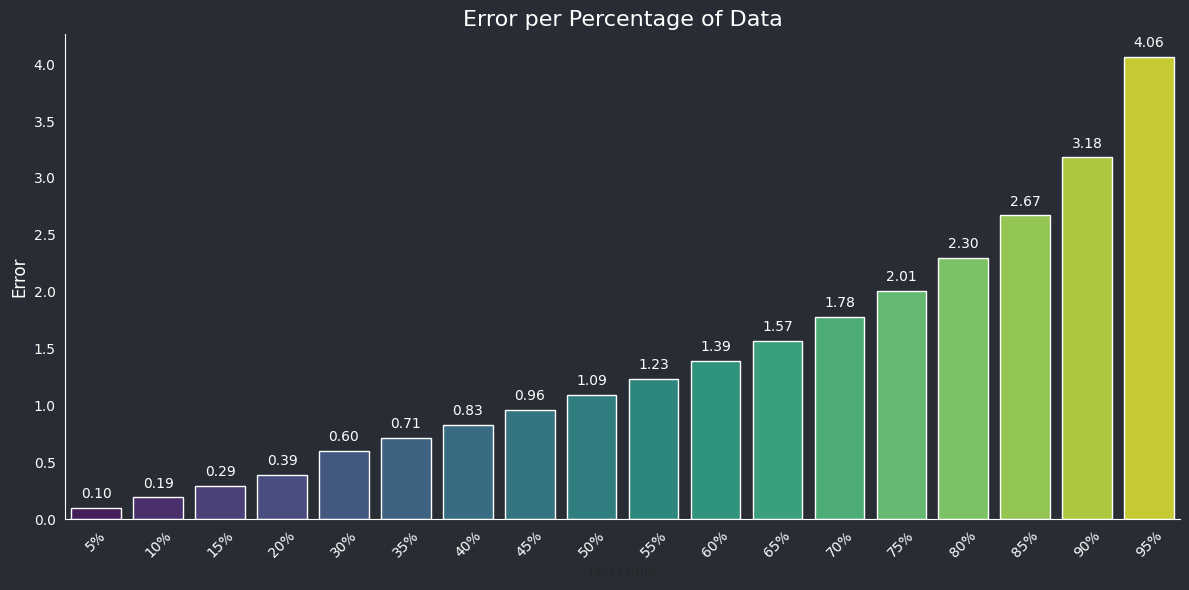

In [341]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sample DataFrame for illustration
# Replace this with your actual percentile_df
import pandas as pd

# Set the overall Seaborn style to 'dark' to complement the background color
sns.set_style("dark")

# Create the figure with the desired background color
plt.figure(figsize=(12, 6), facecolor='#282c34')

# Create the barplot
ax = sns.barplot(x='Percentile', y='Error', data=percentile_df, palette='viridis')

# Set the axes background color to match the figure
ax.set_facecolor('#282c34')

# Update title and labels with a color that contrasts the dark background
plt.title('Error per Percentage of Data', color='white', fontsize=16)
plt.ylabel('Error', color='white', fontsize=12)

# Rotate x-ticks and set their color
plt.xticks(rotation=45, color='white')
plt.yticks(color='white')

# Remove the top and right spines for a cleaner look
sns.despine()

# Add error labels on top of each bar with contrasting color
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.2f}',  # Format the error value; adjust decimals as needed
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom',
                fontsize=10, color='white',  # Use white color for visibility
                xytext=(0, 5),  # Offset text by 5 points above the bar
                textcoords='offset points')

# Adjust layout to prevent clipping of tick-labels and other elements
plt.tight_layout()

# Display the plot
plt.show()


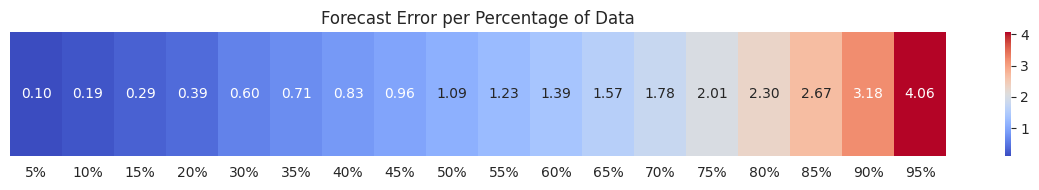

In [333]:
# light heatmap
error_values = percentile_df['Error'].values.reshape(1, -1)
percentiles = percentile_df['Percentile'].tolist()

plt.figure(figsize=(12, 2))
sns.heatmap(error_values, annot=True, fmt=".2f", cmap='coolwarm', xticklabels=percentiles, yticklabels=[])
plt.title('Forecast Error per Percentage of Data')
plt.tight_layout()
plt.show()

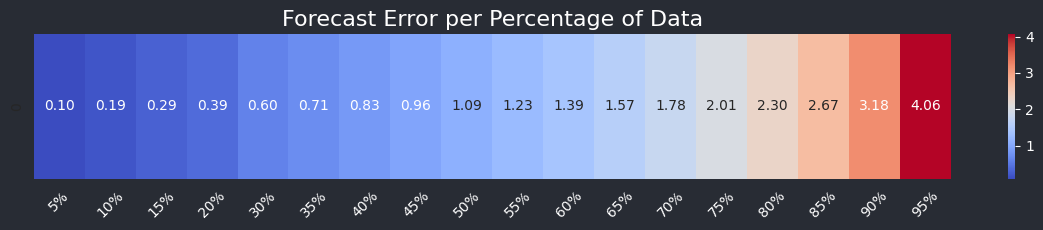

In [334]:
# dark heatmap
plt.figure(figsize=(12, 2.4), facecolor='#282c34')

# Create the heatmap
ax = sns.heatmap(
    error_values,
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    xticklabels=percentiles,
    cbar=True,
)

plt.title('Forecast Error per Percentage of Data', color='white', fontsize=16)

# Adjust the color bar to match the dark theme
cbar = ax.collections[0].colorbar
cbar.ax.yaxis.set_tick_params(color='white')
cbar.ax.yaxis.label.set_color('white')
cbar.ax.tick_params(labelsize=10, labelcolor='white')
plt.xticks(rotation=45, color='white')

plt.tight_layout()
plt.show()

In [233]:
import pandas as pd

df = pd.read_csv('/content/error_data.csv')
df = df.drop({'Predicted', 'Actual'}, axis=1)
df['Error'] = df['Error'].round(1)
error_counts = df['Error'].value_counts().reset_index()
error_counts.columns = ['Error', 'Count']

sum = error_counts['Count'].sum()
error_counts['Percentage'] = error_counts['Count'] / sum * 100


error_counts = error_counts.sort_values(by='Error') # Sort by the 'Error' column
error_counts.head()

,Error,Count,Percentage
276,-14.3,2,0.000208
292,-14.1,1,0.000104
277,-14.0,2,0.000208
290,-13.9,1,0.000104
279,-13.8,1,0.000104


In [1]:
# prompt: plot the error_counts['Count'] in a graph, line

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(error_counts['Error'], error_counts['Percentage'])
plt.xlabel('Error')
plt.ylabel('Percentage')
plt.title('Error Percentage')
plt.grid(True)
plt.show()


NameError: name 'error_counts' is not defined

<Figure size 1000x600 with 0 Axes>